In [2]:
import pandas as pd
import numpy as np
data_f = pd.read_excel(r'/content/Lab Session1 Data.xlsx', sheet_name="Purchase data")
irctc_data = pd.read_excel(r'/content/Lab Session1 Data.xlsx', sheet_name= "IRCTC Stock Price")
##Make sute to place Lab Session Data 1 Excel FIle in above read excel argument
df = pd.DataFrame(data_f)
df.drop(df.iloc[:, 5:22], axis=1, inplace=True)
print(df)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198


In [3]:
A_purchase = df.iloc[0:9,1:4]
print(A_purchase)
A=np.array(A_purchase)
print(A)

   Candies (#)  Mangoes (Kg)  Milk Packets (#)
0           20             6                 2
1           16             3                 6
2           27             6                 2
3           19             1                 2
4           24             4                 2
5           22             1                 5
6           15             4                 2
7           18             4                 2
8           21             1                 4
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]]


In [4]:
C_total = df.iloc[0:9,4]
C = np.array(C_total)
C = C.reshape(9,1)
print(C)


[[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]]


In [5]:
print("Dimensionality of given data is", df.shape)

Dimensionality of given data is (10, 5)


In [6]:
print("Number of rows are", df.shape[0])

Number of rows are 10


In [7]:
print("The rank of matrix is ", np.linalg.matrix_rank(A_purchase))

The rank of matrix is  3


In [8]:
Y = np.linalg.pinv(A) 
print(Y)

[[-0.01029074 -0.03304951  0.01017895  0.02894814  0.01827148  0.01045111
  -0.0080467   0.00072602  0.01661679]
 [ 0.0907317   0.07382695  0.03170332 -0.09063689 -0.01891929 -0.06850066
   0.05697434  0.03167646 -0.07587941]
 [ 0.00524254  0.17851348 -0.05838688 -0.06472439 -0.06273987  0.04626489
   0.01906939 -0.00820036  0.00926846]]


In [9]:
X = np.dot(Y,C)
print("Solution is", X)

Solution is [[ 1.]
 [55.]
 [18.]]


In [10]:
print("Cost of a candy is", X[0])
print("COst of a mangoe is", X[1])
print("Cost of a milk packet is", X[2])

Cost of a candy is [1.]
COst of a mangoe is [55.]
Cost of a milk packet is [18.]


In [11]:
new_df = df
status_pay = []
for row in df['Payment (Rs)']:
  if row < 200 :
    status_pay.append('Rich')
  elif row>=200 :
    status_pay.append('Poor')
new_df['Pay']= status_pay
print(new_df)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)   Pay
0      C_1           20             6                 2           386  Poor
1      C_2           16             3                 6           289  Poor
2      C_3           27             6                 2           393  Poor
3      C_4           19             1                 2           110  Rich
4      C_5           24             4                 2           280  Poor
5      C_6           22             1                 5           167  Rich
6      C_7           15             4                 2           271  Poor
7      C_8           18             4                 2           274  Poor
8      C_9           21             1                 4           148  Rich
9     C_10           16             2                 4           198  Rich


In [12]:
irctc_df = pd.DataFrame(irctc_data)
print(irctc_df)

             Date Month  Day    Price     Open     High      Low   Volume  \
0    Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1    Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2    Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3    Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4    Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   
..            ...   ...  ...      ...      ...      ...      ...      ...   
244  Jul 07, 2020   Jul  Tue  1397.40  1410.00  1411.00  1390.05  480.21K   
245  Jul 06, 2020   Jul  Mon  1400.75  1405.50  1415.50  1394.00  614.93K   
246  Jul 03, 2020   Jul  Fri  1405.10  1415.00  1425.00  1398.00  599.49K   
247  Jul 02, 2020   Jul  Thu  1412.35  1440.00  1467.80  1395.30    2.16M   
248  Jul 01, 2020   Jul  Wed  1363.05  1363.65  1377.00  1356.00  383.00K   

       Chg%  
0    0.0020  
1    0.0043  
2   -0.0020  
3   -0.0026  
4   -

In [13]:
irctc_mean = irctc_df["Price"].mean()
print("Price mean is ", irctc_mean)

Price mean is  1560.6634538152612


In [14]:
irctc_var = irctc_df["Price"].var()
print("Price Variance is ", irctc_var)

Price Variance is  58732.36535253918


In [15]:
wed_mean = irctc_df.loc[irctc_df['Day'] == 'Wed', 'Price'].mean()
print(wed_mean)
print("By comapring we can see the sales at IRCTC are less during Wednesdays compared to average")

1550.7060000000001
By comapring we can see the sales at IRCTC are less during Wednesdays compared to average


In [16]:
apr_mean = irctc_df.loc[irctc_df['Month'] == 'Apr', 'Price'].mean()
print(apr_mean)
print("By comapring we can see the sales at IRCTC are higher during the April Month compared to the average")

1698.9526315789474
By comapring we can see the sales at IRCTC are higher during the April Month compared to the average


In [19]:
no_of_neg = 0



for index,row in irctc_df.iterrows():
    if row['Chg%'] < 0:
        no_of_neg+=1
        
print("probability of making loss ",no_of_neg/irctc_df.shape[0])

probability of making loss  0.4979919678714859


In [20]:
no_of_wed=0
no_of_wed_pos=0



for index,row in irctc_df.iterrows():
    if row['Day']=='Wed':
        if row['Chg%']>0:
            no_of_wed_pos+=1
        no_of_wed+=1
        
print("probability of getting profit on Wednesday ",no_of_wed_pos/no_of_wed)

probability of getting profit on Wednesday  0.42


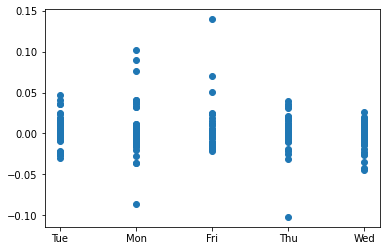

In [23]:
import matplotlib.pyplot as plt
days= []
chg= []
for index,row in irctc_df.iterrows():
    days.append(row['Day'])
    chg.append(row['Chg%'])


plt.scatter(days, chg)
plt.show()